In [54]:
%pip install yfinance seaborn

Note: you may need to restart the kernel to use updated packages.


In [55]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
#list of stock symbols
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TPE', 'NFLX', 'TSLA', 'NVDA', 'INTC', 'AMD']



In [57]:
# Downloadngi stock data
data = yf.download(stocks, start='2008-01-01', end='2023-05-20')



[*********************100%***********************]  10 of 10 completed


In [58]:
# Preprocess the data
data = data['Adj Close'].pct_change().dropna()

In [59]:
# Split the data into features (X) and targets (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [60]:
# Spliting into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


In [63]:
# Compiling
model.compile(loss='mse', optimizer='adam')

In [64]:
# Training
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
82/82 [==============================] - 1s 3ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 2/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011

In [65]:
# Make predictions on the test set
predictions = model.predict(X_test)

21/21 [==============================] - 0s 984us/step


In [66]:
# Convert predictions and actual values to DataFrame
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})

In [67]:
# using seaborn
plt.figure(figsize=(12,6 ))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Stock Prices')

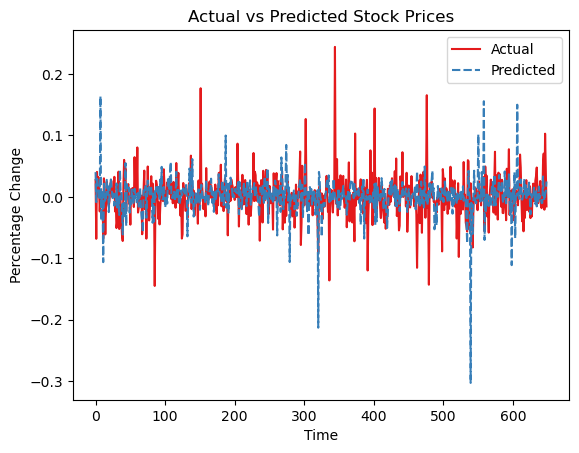

In [68]:
# Line plot
plt.subplot()
sns.lineplot(data=df_predictions, palette='Set1')
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Actual vs Predicted Stock Prices')

Text(0.5, 1.0, 'Actual vs Predicted Stock Prices')

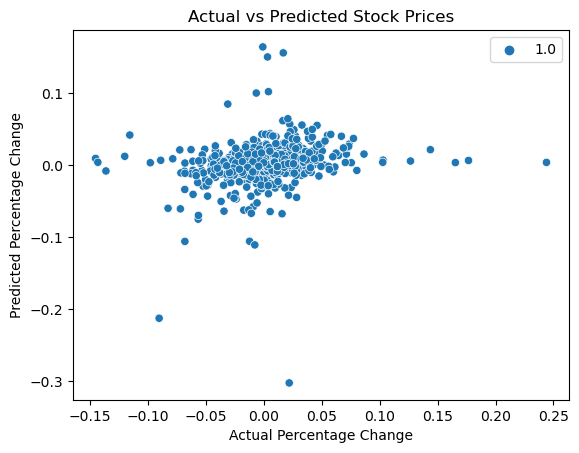

In [69]:
#scatter plot
plt.subplot()
sns.scatterplot(x='Actual', y='Predicted', hue=np.ones_like(df_predictions['Actual']), data=df_predictions)
plt.xlabel('Actual Percentage Change')
plt.ylabel('Predicted Percentage Change')
plt.title('Actual vs Predicted Stock Prices')


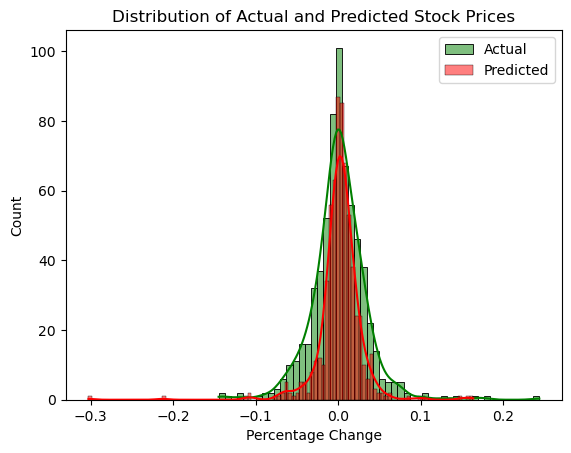

In [70]:
#distribution plot
plt.subplot()
sns.histplot(data=df_predictions, x='Actual', kde=True, label='Actual', color='green')
sns.histplot(data=df_predictions, x='Predicted', kde=True, label='Predicted', color='red')
plt.xlabel('Percentage Change')
plt.ylabel('Count')
plt.title('Distribution of Actual and Predicted Stock Prices')
plt.legend()

Text(0.5, 1.0, 'Box Plot of Actual and Predicted Stock Prices')

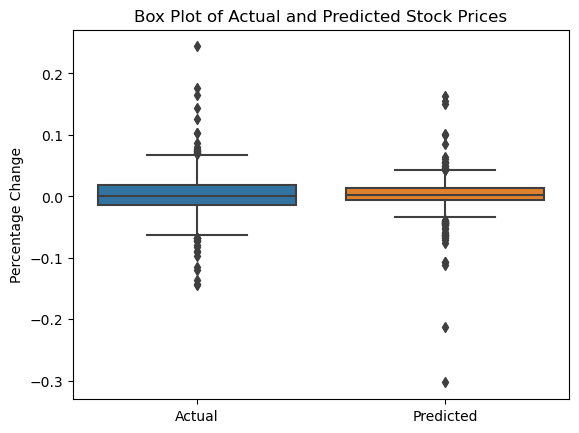

In [71]:
#boxplot
plt.subplot()
sns.boxplot(data=df_predictions[['Actual', 'Predicted']])
plt.ylabel('Percentage Change')
plt.title('Box Plot of Actual and Predicted Stock Prices')


Text(0.5, 1.0, 'Violin Plot of Actual and Predicted Stock Prices')

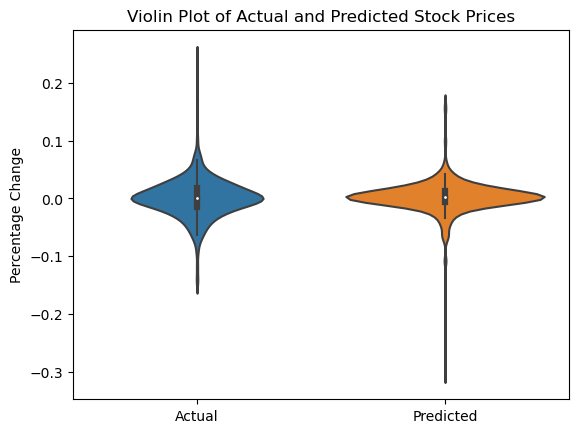

In [72]:
# Violin plot
plt.subplot()
sns.violinplot(data=df_predictions[['Actual', 'Predicted']])
plt.ylabel('Percentage Change')
plt.title('Violin Plot of Actual and Predicted Stock Prices')


c:\Users\20pra\anaconda3\envs\AIML\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\20pra\anaconda3\envs\AIML\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot of Actual and Predicted Stock Prices')

c:\Users\20pra\anaconda3\envs\AIML\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\20pra\anaconda3\envs\AIML\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


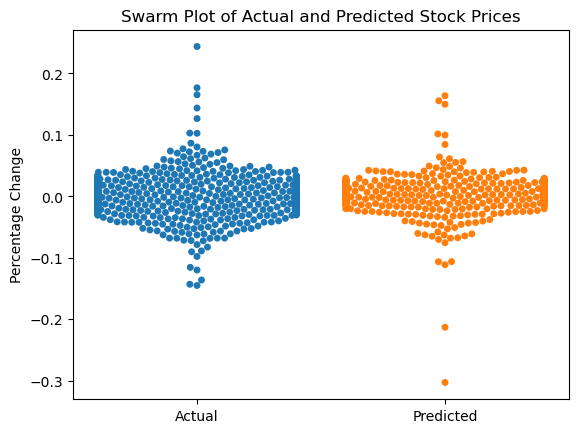

In [73]:
# Swarm plot
plt.subplot()
sns.swarmplot(data=df_predictions[['Actual', 'Predicted']])
plt.ylabel('Percentage Change')
plt.title('Swarm Plot of Actual and Predicted Stock Prices')

Text(0.5, 1.0, 'Correlation Heatmap of Actual and Predicted Stock Prices')

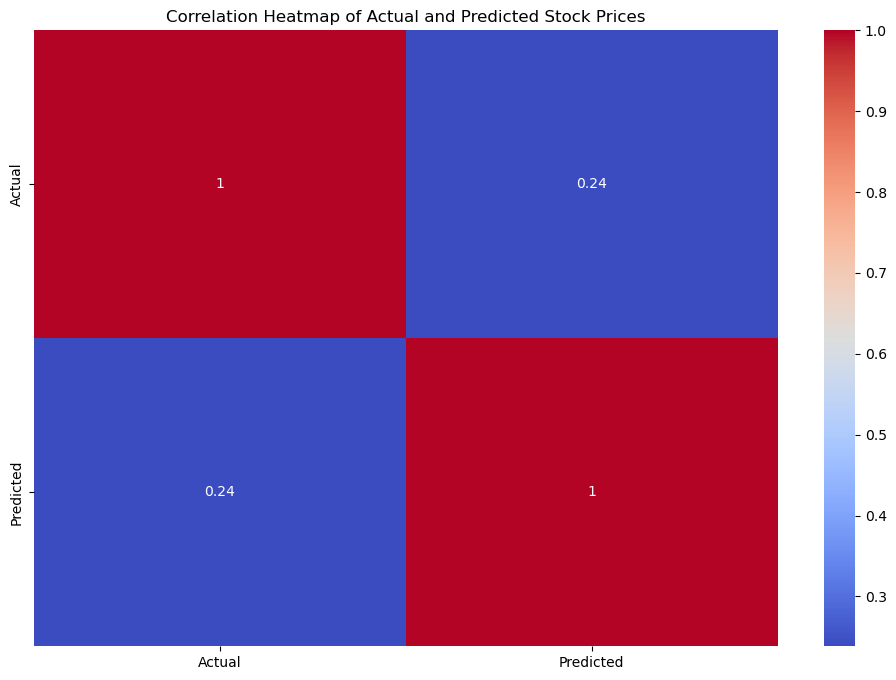

In [74]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_predictions.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Actual and Predicted Stock Prices')